In [1]:
import pandas as pd
import numpy as np
import glob

cols = ['SYS_RECID', 'YEAR', 'QTR', 'FACLNBR', 'MCARE_NBR', 'TYPE_SERV',
       'SERV_LOC', 'PRO_CODE', 'FAC_REGION', 'FAC_COUNTY', 'ETHNICITY', 'RACE',
       'SEX', 'AGE', 'LOSDAYS', 'WEEKDAY', 'ZIPCODE', 'PTCOUNTY', 'PTSTATE',
       'PTCOUNTRY', 'ADMSRC', 'HR_ARRIVAL', 'EDHR_DISCH', 'PT_STATUS', 'PAYER',
       'REASON_CDE', 'EVALCODE1', 'EVALCODE2', 'EVALCODE3', 'EVALCODE4',
       'EVALCODE5', 'OTHCPT1', 'OTHCPT2', 'OTHCPT3', 'OTHCPT4', 'OTHCPT5',
       'OTHCPT6', 'OTHCPT7', 'OTHCPT8', 'OTHCPT9', 'OTHCPT10', 'OTHCPT11',
       'OTHCPT12', 'OTHCPT13', 'OTHCPT14', 'OTHCPT15', 'OTHCPT16', 'OTHCPT17',
       'OTHCPT18', 'OTHCPT19', 'OTHCPT20', 'OTHCPT21', 'OTHCPT22', 'OTHCPT23',
       'OTHCPT24', 'OTHCPT25', 'OTHCPT26', 'OTHCPT27', 'OTHCPT28', 'OTHCPT29',
       'OTHCPT30', 'PRINDIAG', 'OTHDIAG1', 'OTHDIAG2', 'OTHDIAG3', 'OTHDIAG4',
       'OTHDIAG5', 'OTHDIAG6', 'OTHDIAG7', 'OTHDIAG8', 'OTHDIAG9', 'ECMORB1',
       'ECMORB2', 'ECMORB3', 'ATTEN_PHYI', 'ATTEN_PHYN', 'OPER_PHYID',
       'OPER_PHYNP', 'OTHOPER_PH', 'OTHOPER__A', 'PHARMCHGS', 'MEDCHGS',
       'LABCHGS', 'RADCHGS', 'CARDIOCHGS', 'OPRMCHGS', 'ANESCHGS', 'RECOVCHGS',
       'ERCHGS', 'TRAUMACHGS', 'OBSERCHGS', 'GASTROCHGS', 'LITHOCHGS',
       'OTHCHGS', 'TCHGS']

unneeded_data = ['EVALCODE2','EVALCODE3','EVALCODE4','EVALCODE5','OTHCPT6','OTHCPT7','OTHCPT8',
                'OTHCPT9','OTHCPT10','OTHCPT11','OTHCPT12','OTHCPT13', 'OTHCPT14',
                'OTHCPT15', 'OTHCPT16', 'OTHCPT17', 'OTHCPT18','OTHCPT19', 'OTHCPT20',
                'OTHCPT21', 'OTHCPT22', 'OTHCPT23', 'OTHCPT24','OTHCPT25', 'OTHCPT26',
                'OTHCPT27', 'OTHCPT28', 'OTHCPT29', 'OTHCPT30','OTHDIAG6','OTHDIAG7',
                'OTHDIAG8','OTHDIAG9','OTHOPER_PH','OTHOPER__A','PHARMCHGS', 'MEDCHGS', 'LABCHGS',
                'RADCHGS', 'CARDIOCHGS', 'OPRMCHGS', 'ANESCHGS', 'RECOVCHGS', 'ERCHGS',
                'TRAUMACHGS', 'OBSERCHGS', 'GASTROCHGS', 'LITHOCHGS', 'OTHCHGS','TCHGS','OPER_PHYID',
                 'OPER_PHYNP','PRINPROC','OTHPROC1','OTHPROC2','OTHPROC3','OTHPROC4']

#These are the opioid codes that we are most interested in. We will filter the [REASON_CDE] column by these specific codes
opioid_dx = ('F11.10','F11.120','F11.121',
'F11.122','F11.129','F11.14','F11.150','F11.151','F11.159','F11.181','F11.182','F11.188',
'F11.19','F11.20','F11.220','F11.221','F11.222','F11.229','F11.23','F11.24','F11.250',
'F11.251','F11.259','F11.281','F11.282','F11.288','F11.29','F11.90','F11.920','F11.921',
'F11.922','F11.929','F11.93','F11.94','F11.950','F11.951','F11.959','F11.981','F11.982',
'F11.988','F11.99','T40.0X1A','T40.0X1D','T40.0X1S','T40.0X4A','T40.0X4D','T40.0X4S',
'T40.0X5A','T40.0X5D','T40.0X5S','T40.1X1A','T40.1X1D','T40.1X1S','T40.1X4A','T40.1X4D',
'T40.1X4S','T40.2X1A','T40.2X1D','T40.2X1S','T40.2X4A','T40.2X4D','T40.2X4S','T40.2X5A',
'T40.2X5D','T40.2X5S','T40.3X1A','T40.3X1D','T40.3X1S','T40.3X4A','T40.3X4D','T40.3X4S',
'T40.3X5A','T40.3X5D','T40.3X5S','T40.4X1A','T40.4X1D','T40.4X1S','T40.4X4A','T40.4X4D',
'T40.4X4S','T40.4X5A','T40.4X5D','T40.4X5S','T40.601A','T40.601D','T40.601S','T40.604A',
'T40.604D','T40.604S','T40.605A','T40.605D','T40.605S','T40.691A','T40.691D','T40.691S',
'T40.694A','T40.694D','T40.694S','T40.695A','T40.695D','T40.695S','T40.0X2A','T40.0X2D',
'T40.0X2S','T40.0X3A','T40.0X3D','T40.0X3S','T40.1X2A','T40.1X2D','T40.1X2S','T40.1X3A',
'T40.1X3D','T40.1X3S','T40.2X2A','T40.2X2D','T40.2X2S','T40.2X3A','T40.2X3D','T40.2X3S',
'T40.3X2A','T40.3X2D','T40.3X2S','T40.3X3A','T40.3X3D','T40.3X3S','T40.4X2A','T40.4X2D',
'T40.4X2S','T40.4X3A','T40.4X3D','T40.4X3S','T40.602A','T40.602D','T40.602S','T40.603A',
'T40.603D','T40.603S','T40.692A','T40.692D','T40.692S','T40.693A','T40.693D','T40.693S') 

#I have 8 different csv files :

#df18Q2_pt1
#df18Q2_pt2
#df18Q1_pt1
#df18Q1_pt2
#df17Q3_pt1
#df17Q3_pt2
#df17Q4_pt1
#df17Q4_pt2

#read csv files as one

#usecols = [i for i in cols if i != 'unneeded_data']

# glob.glob('data*.csv') - returns List[str]
# pd.read_csv(f) - returns pd.DataFrame()
# for f in glob.glob() - returns a List[DataFrames]
# pd.concat() - returns one pd.DataFrame()

df = pd.concat([pd.read_csv(f , dtype= object) for f in glob.glob('/Users/EricJC/Desktop/Data/*.csv')], ignore_index = True, sort=False)
df = df.drop(unneeded_data, axis = 1)
df = df.loc[df['REASON_CDE'].isin(opioid_dx)]
df.head()

,SYS_RECID,YEAR,QTR,FACLNBR,MCARE_NBR,TYPE_SERV,SERV_LOC,PRO_CODE,FAC_REGION,FAC_COUNTY,...,OTHDIAG1,OTHDIAG2,OTHDIAG3,OTHDIAG4,OTHDIAG5,ECMORB1,ECMORB2,ECMORB3,ATTEN_PHYI,ATTEN_PHYN
131,100140791,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.9,NaN,NaN,ME124985,1336497890
331,100140916,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.009,NaN,NaN,ME131402,1164835443
544,100141129,2018,1,100029,100029,2,NaN,23,11,13,...,F11.10,F19.10,F20.9,M06.9,NaN,Y92.009,NaN,NaN,OS7598,1902802713
701,100141551,2018,1,100029,100029,2,NaN,23,11,13,...,T40.5X1A,F14.10,F18.10,NaN,NaN,NaN,NaN,NaN,ME107380,1639495245
1877,100142462,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS7598,1902802713


In [2]:
df.shape

(14468, 43)

In [3]:
df.columns

Index(['SYS_RECID', 'YEAR', 'QTR', 'FACLNBR', 'MCARE_NBR', 'TYPE_SERV',
       'SERV_LOC', 'PRO_CODE', 'FAC_REGION', 'FAC_COUNTY', 'ETHNICITY', 'RACE',
       'SEX', 'AGE', 'LOSDAYS', 'WEEKDAY', 'ZIPCODE', 'PTCOUNTY', 'PTSTATE',
       'PTCOUNTRY', 'ADMSRC', 'HR_ARRIVAL', 'EDHR_DISCH', 'PT_STATUS', 'PAYER',
       'REASON_CDE', 'EVALCODE1', 'OTHCPT1', 'OTHCPT2', 'OTHCPT3', 'OTHCPT4',
       'OTHCPT5', 'PRINDIAG', 'OTHDIAG1', 'OTHDIAG2', 'OTHDIAG3', 'OTHDIAG4',
       'OTHDIAG5', 'ECMORB1', 'ECMORB2', 'ECMORB3', 'ATTEN_PHYI',
       'ATTEN_PHYN'],
      dtype='object')

In [22]:
df.groupby(['YEAR', 'QTR'])
df

,SYS_RECID,YEAR,QTR,FACLNBR,MCARE_NBR,TYPE_SERV,SERV_LOC,PRO_CODE,FAC_REGION,FAC_COUNTY,...,OTHDIAG1,OTHDIAG2,OTHDIAG3,OTHDIAG4,OTHDIAG5,ECMORB1,ECMORB2,ECMORB3,ATTEN_PHYI,ATTEN_PHYN
131,100140791,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.9,NaN,NaN,ME124985,1336497890
331,100140916,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.009,NaN,NaN,ME131402,1164835443
544,100141129,2018,1,100029,100029,2,NaN,23,11,13,...,F11.10,F19.10,F20.9,M06.9,NaN,Y92.009,NaN,NaN,OS7598,1902802713
701,100141551,2018,1,100029,100029,2,NaN,23,11,13,...,T40.5X1A,F14.10,F18.10,NaN,NaN,NaN,NaN,NaN,ME107380,1639495245
1877,100142462,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS7598,1902802713
2134,100142718,2018,1,100029,100029,2,NaN,23,11,13,...,F14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ME111268,1487974226
3470,100144055,2018,1,100029,100029,2,NaN,23,11,13,...,D64.9,I95.9,B86,F10.10,NaN,NaN,NaN,NaN,ME109299,1568611390
4715,100147079,2018,1,100029,100029,2,NaN,23,11,13,...,D64.9,F14.10,F31.9,R11.10,NaN,NaN,NaN,NaN,ME107380,1639495245
5795,100145504,2018,1,100029,100029,2,NaN,23,11,13,...,F11.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ME93802,1326011784
6061,100146037,2018,1,100029,100029,2,NaN,23,11,13,...,R11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS7598,1902802713


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

yr = df['YEAR'].value_counts()


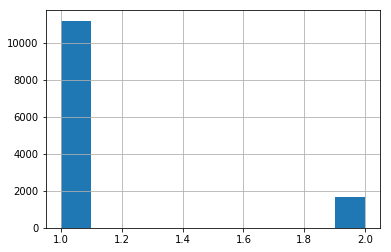

In [39]:
df['SYS_RECID'].value_counts().hist()

In [57]:
pd.crosstab(['YEAR','QTR'], columns=['FACLNBR'])

ValueError: If using all scalar values, you must pass an index

In [ ]:
#Volume = who is coming in and how many?
#disposition = were they admitted/discharged
#times and days trends
#Particular area pts are coming from more
#Particular facility pts are going to more
#payer source